In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from functools import partial, reduce

#merge 4 dataframe to get an 1mth data 

df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200815.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200808.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200801.txt')
dfs = [df1, df2, df3, df4]

merge = partial(pd.merge, on=['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','TIME', 'DESC','ENTRIES','EXITS                                                               '], how='outer')
mta = reduce(merge, dfs)
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,00:00:00,REGULAR,7447810,2532191
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,04:00:00,REGULAR,7447812,2532197
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,08:00:00,REGULAR,7447824,2532208
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,12:00:00,REGULAR,7447852,2532248
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/22/2020,16:00:00,REGULAR,7447937,2532276
...,...,...,...,...,...,...,...,...,...,...,...
838424,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,12:59:32,REGULAR,5554,538
838425,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:00:00,REGULAR,5554,538
838426,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,13:11:06,REGULAR,5554,538
838427,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/31/2020,17:00:00,REGULAR,5554,538


In [2]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838429 entries, 0 to 838428
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   838429 non-null  object
 1   UNIT                                                                  838429 non-null  object
 2   SCP                                                                   838429 non-null  object
 3   STATION                                                               838429 non-null  object
 4   LINENAME                                                              838429 non-null  object
 5   DIVISION                                                              838429 non-null  object
 6   DATE                                                                  838429 non-null  objec

In [3]:
def preprocess(mta):
    
    # Standardize column name 
    mta.columns = mta.columns.str.strip()
        
    # Create DATETIME column from 'DATE' and 'TIME' cols
    mta['DATETIME'] = pd.to_datetime(mta.DATE + " " + mta.TIME, 
                                    format="%m/%d/%Y %H:%M:%S")
    
    # Create 'DOW' (Day of Week) column from 'DATETIME'
    mta['DOW'] = mta[['DATETIME']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATETIME'], '%A'), axis=1)
       
    # Drop unnecessary columns
    mta = mta.drop(['LINENAME', 'DIVISION', 'DATE', 'DESC','TIME'], axis=1) 

    return mta

In [4]:
mta2 = preprocess(mta)
mta2

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW
0,A002,R051,02-00-00,59 ST,7447810,2532191,2020-08-22 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,7447812,2532197,2020-08-22 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,7447824,2532208,2020-08-22 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,7447852,2532248,2020-08-22 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,7447937,2532276,2020-08-22 16:00:00,Saturday
...,...,...,...,...,...,...,...,...
838424,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,538,2020-07-31 12:59:32,Friday
838425,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,538,2020-07-31 13:00:00,Friday
838426,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,538,2020-07-31 13:11:06,Friday
838427,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,538,2020-07-31 17:00:00,Friday


In [5]:
# Drop Nulls created by previous cell
print("prior shape: ", mta2.shape)
mta2.dropna(how='any', inplace=True)
print("post shape: ", mta2.shape)

prior shape:  (838429, 8)
post shape:  (838429, 8)


In [6]:
# Check for duplicates for a given turnstile for a given datetime
(mta2
 .groupby(['STATION', 'DATETIME','C/A','UNIT','SCP'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

# Remove duplicates
print("prior shape: ", mta2.shape)
mta2.drop_duplicates(subset=["STATION", "DATETIME",'C/A','UNIT','SCP'], inplace=True)
print("post shape: ", mta2.shape)

prior shape:  (838429, 8)
post shape:  (838412, 8)


In [7]:
mta2 = mta2.sort_values(['STATION','DATETIME','C/A', 'UNIT', 'SCP'])
mta2

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW
663935,H007,R248,00-00-00,1 AV,15459169,17334477,2020-07-25 00:00:00,Saturday
663977,H007,R248,00-00-01,1 AV,61144410,38179100,2020-07-25 00:00:00,Saturday
664019,H007,R248,00-03-00,1 AV,370865984,388060589,2020-07-25 00:00:00,Saturday
664061,H007,R248,00-03-01,1 AV,2606562,1129443,2020-07-25 00:00:00,Saturday
664103,H007,R248,00-03-02,1 AV,6635849,560183,2020-07-25 00:00:00,Saturday
...,...,...,...,...,...,...,...,...
191134,R419,R326,00-00-01,ZEREGA AV,208295,335195,2020-08-28 21:00:00,Friday
191176,R419,R326,00-03-00,ZEREGA AV,1105299,496941,2020-08-28 21:00:00,Friday
191218,R419,R326,00-03-01,ZEREGA AV,1137379,213443,2020-08-28 21:00:00,Friday
191260,R419,R326,00-05-00,ZEREGA AV,229,0,2020-08-28 21:00:00,Friday


In [8]:
# Create diff columns to take entries/exits for given time interval
mta2['entry_diff'] = mta2.groupby(['STATION','C/A', 'UNIT', 'SCP'], as_index=False)['ENTRIES'].diff().tolist()
mta2['exit_diff'] = mta2.groupby(['STATION','C/A', 'UNIT', 'SCP'], as_index=False)['EXITS'].diff().tolist()

In [9]:
mta2.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW,entry_diff,exit_diff
663935,H007,R248,00-00-00,1 AV,15459169,17334477,2020-07-25,Saturday,NaN,NaN
663977,H007,R248,00-00-01,1 AV,61144410,38179100,2020-07-25,Saturday,1.0,21.0
664019,H007,R248,00-03-00,1 AV,370865984,388060589,2020-07-25,Saturday,6.0,117.0
664061,H007,R248,00-03-01,1 AV,2606562,1129443,2020-07-25,Saturday,20.0,230.0
664103,H007,R248,00-03-02,1 AV,6635849,560183,2020-07-25,Saturday,40.0,304.0


In [10]:
# Drop Nulls created by previous groupby().diff()
print("prior shape: ", mta2.shape)
mta2.dropna(how='any', inplace=True)
print("post shape: ", mta2.shape)

prior shape:  (838412, 10)
post shape:  (833449, 10)


In [11]:
# ASSUMPTION: All negative actuals for entries and exits will be dropped from dataset since values should be accumulative 
len_entry_diffs = mta2['entry_diff'].shape[0]
len_exit_diffs = mta2['exit_diff'].shape[0]

negative_entries = mta2[mta2['entry_diff'] < 0].shape[0] / len_entry_diffs
negative_exits = mta2[mta2['exit_diff'] < 0].shape[0] / len_exit_diffs

print('negative_entries: ', negative_entries)
print('negative_exits: ', negative_exits)

## Drop negatives
print("prior shape: ", mta2.shape)
mta2 = mta2.loc[ (mta2['entry_diff'] > 0) & (mta2['exit_diff'] > 0) ]
print("post shape: ", mta2.shape)

negative_entries:  0.007792918342934001
negative_exits:  0.006305124848671005
prior shape:  (833449, 10)
post shape:  (597781, 10)


In [12]:
# Create Outlier Threshold based on total seconds in a day: Assuming that each sec cannot have more than 1 person doing turnstile
threshold_entry = 86400
threshold_exit = 86400

## Drop outliers
print("prior shape: ", mta2.shape)
mta2 = mta2[(mta2['entry_diff'] < threshold_entry) & (mta2['exit_diff'] < threshold_exit)]
print("post shape: ", mta2.shape)

prior shape:  (597781, 10)
post shape:  (597767, 10)


In [13]:
# Create 'TOTAL_TRAFFIC" = exits + entries. This will be our ranking metric

mta2['TRAFFIC'] = mta2['entry_diff'] + mta2['exit_diff']
print("post shape: ", mta2.shape)
mta2.sort_values('TRAFFIC', ascending=False).head()

post shape:  (597767, 11)


,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME,DOW,entry_diff,exit_diff,TRAFFIC
335486,PTH03,R552,00-00-03,JOURNAL SQUARE,474367,91531,2020-08-14 23:27:41,Friday,42192.0,33163.0,75355.0
335727,PTH03,R552,00-00-09,JOURNAL SQUARE,139377,705156,2020-08-14 21:21:37,Friday,42050.0,33037.0,75087.0
336128,PTH03,R552,00-01-08,JOURNAL SQUARE,627,476,2020-08-14 18:21:20,Friday,41843.0,32827.0,74670.0
335805,PTH03,R552,00-01-00,JOURNAL SQUARE,18539,60931,2020-08-14 15:31:00,Friday,41593.0,32619.0,74212.0
485835,N094,R029,01-03-04,WORLD TRADE CTR,477023,160658,2020-08-03 20:00:00,Monday,49152.0,2.0,49154.0


In [14]:
# Force time intervals to 4-hour frequency
mta2['TIME'] = mta2['DATETIME'].apply(lambda x: x.time())
mta2 = mta2.groupby(['C/A',
                     'UNIT', 
                     'SCP', 
                     'STATION',
                     pd.Grouper(key='DATETIME', freq='4H'), 
                     'DOW', 
                     'TIME']).sum().reset_index()

# Shift time intervals back 4 hours to make DOW accurate reading of day
mta2['DATETIME'] = mta2['DATETIME'].apply(lambda x: x - datetime.timedelta(hours=4))

print("UNIQUE TIMES: ", mta2['TIME'].unique())

UNIQUE TIMES:  [datetime.time(4, 0) datetime.time(8, 0) datetime.time(12, 0) ...
 datetime.time(12, 30, 48) datetime.time(12, 59, 32)
 datetime.time(13, 11, 6)]


In [15]:
# taken from preprocess()
mta2['DOW'] = mta2['DATETIME'].apply(lambda x: datetime.datetime.strftime(x, '%A'))
mta2

,C/A,UNIT,SCP,STATION,DATETIME,DOW,TIME,ENTRIES,EXITS,entry_diff,exit_diff,TRAFFIC
0,A002,R051,02-00-00,59 ST,2020-07-25 00:00:00,Saturday,04:00:00,7436572,2527900,134.0,14.0,148.0
1,A002,R051,02-00-00,59 ST,2020-07-25 04:00:00,Saturday,08:00:00,7436581,2527907,58.0,18.0,76.0
2,A002,R051,02-00-00,59 ST,2020-07-25 08:00:00,Saturday,12:00:00,7436611,2527942,40.0,59.0,99.0
3,A002,R051,02-00-00,59 ST,2020-07-25 12:00:00,Saturday,16:00:00,7436681,2527962,9.0,31.0,40.0
4,A002,R051,02-00-00,59 ST,2020-07-25 16:00:00,Saturday,20:00:00,7436825,2527978,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
597762,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-01 16:00:00,Saturday,21:00:00,5554,538,165.0,9.0,174.0
597763,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-01 20:00:00,Saturday,01:00:00,5554,538,161.0,1.0,162.0
597764,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-02 04:00:00,Sunday,09:00:00,5554,538,174.0,1.0,175.0
597765,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2020-08-02 08:00:00,Sunday,13:00:00,5554,538,186.0,4.0,190.0


In [19]:
mta2 = mta2.drop(['C/A','UNIT', 'SCP'], axis=1) 
mta2

,STATION,DATETIME,DOW,TIME,ENTRIES,EXITS,entry_diff,exit_diff,TRAFFIC
0,59 ST,2020-07-25 00:00:00,Saturday,04:00:00,7436572,2527900,134.0,14.0,148.0
1,59 ST,2020-07-25 04:00:00,Saturday,08:00:00,7436581,2527907,58.0,18.0,76.0
2,59 ST,2020-07-25 08:00:00,Saturday,12:00:00,7436611,2527942,40.0,59.0,99.0
3,59 ST,2020-07-25 12:00:00,Saturday,16:00:00,7436681,2527962,9.0,31.0,40.0
4,59 ST,2020-07-25 16:00:00,Saturday,20:00:00,7436825,2527978,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
597762,RIT-ROOSEVELT,2020-08-01 16:00:00,Saturday,21:00:00,5554,538,165.0,9.0,174.0
597763,RIT-ROOSEVELT,2020-08-01 20:00:00,Saturday,01:00:00,5554,538,161.0,1.0,162.0
597764,RIT-ROOSEVELT,2020-08-02 04:00:00,Sunday,09:00:00,5554,538,174.0,1.0,175.0
597765,RIT-ROOSEVELT,2020-08-02 08:00:00,Sunday,13:00:00,5554,538,186.0,4.0,190.0


In [16]:
# Focus on TRAFFIC
mta2.drop(['ENTRIES', 'EXITS', 'entry_diff', 'exit_diff'], axis=1, inplace=True)
mta2.head()

,C/A,UNIT,SCP,STATION,DATETIME,DOW,TIME,TRAFFIC
0,A002,R051,02-00-00,59 ST,2020-07-25 00:00:00,Saturday,04:00:00,148.0
1,A002,R051,02-00-00,59 ST,2020-07-25 04:00:00,Saturday,08:00:00,76.0
2,A002,R051,02-00-00,59 ST,2020-07-25 08:00:00,Saturday,12:00:00,99.0
3,A002,R051,02-00-00,59 ST,2020-07-25 12:00:00,Saturday,16:00:00,40.0
4,A002,R051,02-00-00,59 ST,2020-07-25 16:00:00,Saturday,20:00:00,2.0


In [18]:
#Focus on Top Stations 
mta2_station = mta2.groupby(['STATION'])['TRAFFIC'].sum().sort_values(ascending = False).head(10)
mta2_station = pd.DataFrame(mta2_station.reset_index())
mta2_station

,STATION,TRAFFIC
0,34 ST-PENN STA,1863905.0
1,34 ST-HERALD SQ,1494996.0
2,125 ST,1416187.0
3,86 ST,1273737.0
4,14 ST-UNION SQ,1255135.0
5,42 ST-PORT AUTH,1198266.0
6,GRD CNTRL-42 ST,1195471.0
7,23 ST,1096553.0
8,FLUSHING-MAIN,1054372.0
9,FULTON ST,1019065.0


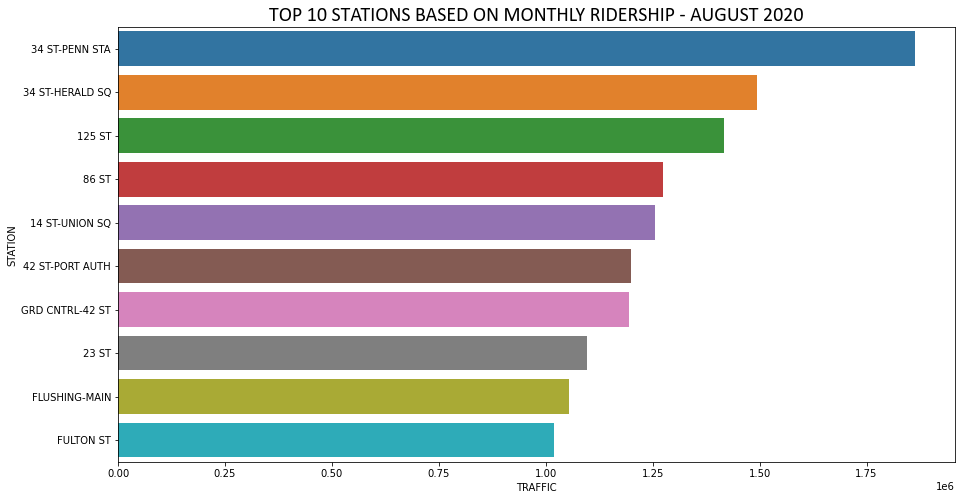

In [19]:
plt.figure(figsize=(15,8))
plt.title('TOP 10 STATIONS BASED ON MONTHLY RIDERSHIP - AUGUST 2020',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.barplot(data = mta2_station, y = mta2_station.STATION, x = mta2_station.TRAFFIC)
plt.show()

In [20]:
#Focus on Day of Week 
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mta2_DOW = mta2.groupby(['DOW'])['TRAFFIC'].sum().reset_index()
mta2_DOW['DOW'] = pd.Categorical(mta2_DOW['DOW'], categories=cats, ordered=True)
mta2_DOW = mta2_DOW.sort_values('DOW')
mta2_DOW

,DOW,TRAFFIC
1,Monday,11215688.0
5,Tuesday,11113156.0
6,Wednesday,10836334.0
4,Thursday,10949318.0
0,Friday,11817270.0
2,Saturday,12138628.0
3,Sunday,12002600.0


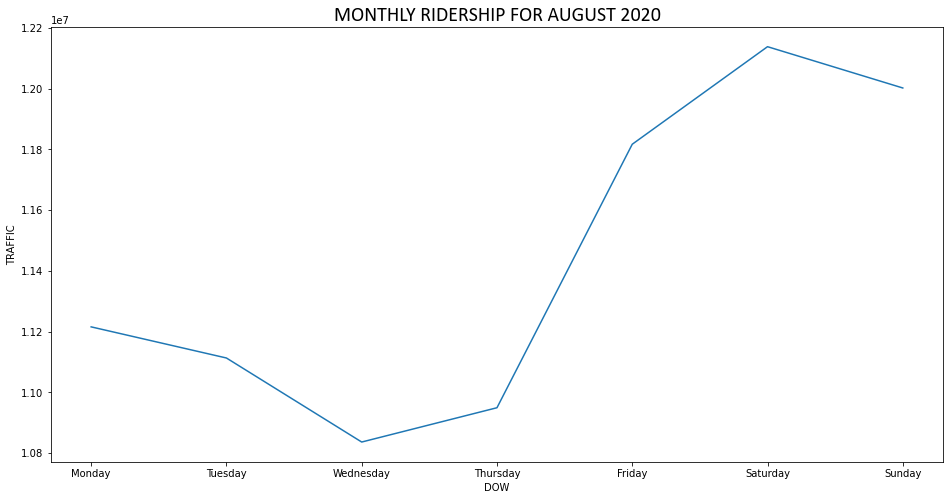

In [21]:
plt.figure(figsize=(16,8))
plt.title('MONTHLY RIDERSHIP FOR AUGUST 2020',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.lineplot(data = mta2_DOW, x = mta2_DOW.DOW, y = mta2_DOW.TRAFFIC)
plt.show()

In [22]:
mta2_DOW.groupby(['DOW']).sum().sort_values(by = 'TRAFFIC', ascending = False)

,TRAFFIC
DOW,
Saturday,12138628.0
Sunday,12002600.0
Friday,11817270.0
Monday,11215688.0
Tuesday,11113156.0
Thursday,10949318.0
Wednesday,10836334.0


<ipython-input-76-86d80ee09c1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta2_DOW__STATIONS3['DOW'] = pd.Categorical(mta2_DOW__STATIONS3['DOW'], categories=cats, ordered=True)


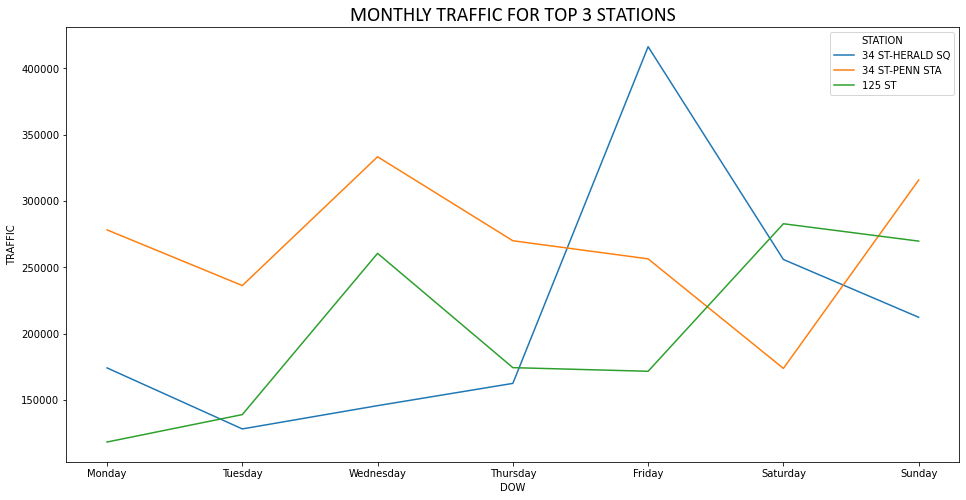

In [76]:
mta2_STATION_DOW = mta2.groupby(['STATION', 'DOW'])['TRAFFIC'].sum().sort_values(ascending = False).reset_index()
mta2_DOW__STATIONS3 = mta2_STATION_DOW[mta2_STATION_DOW['STATION'].isin(['34 ST-PENN STA', '34 ST-HERALD SQ', '125 ST'])]

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mta2_DOW__STATIONS3['DOW'] = pd.Categorical(mta2_DOW__STATIONS3['DOW'], categories=cats, ordered=True)

plt.figure(figsize=(16,8))
plt.title('MONTHLY TRAFFIC FOR TOP 3 STATIONS',family='CALIBRI',fontsize = 20,loc='CENTER',color='black');
sns.lineplot(data = mta2_DOW__STATIONS3, x = mta2_DOW__STATIONS3.DOW, y = mta2_DOW__STATIONS3.TRAFFIC, hue = 'STATION')
plt.show()

In [23]:
def average_hourly_overday(df, n_stations = 10):
    """ Return line chart that shows average daily TRAFFIC
        by TIME (i.e. 4-hour time intervals)
    """
    # Take only relavent columns
    df_pre = df[['STATION', 'DATETIME', 'TRAFFIC', 'TIME']] 
    
    # Group into dailies through sum and then find the average for stations per day
    df1 = df_pre.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
    .sum()\
    .reset_index()\
    .groupby(['STATION'])\
    .mean()\
    .TRAFFIC\
    .sort_values(ascending=False)[0:n_stations]
    
    # Collection station labels
    stations = df1.reset_index().STATION.unique()
    
     # Create new dataframe 
    df2 = df_pre[df.STATION.apply(lambda x: x in stations)].copy()
    
    # Create time columnn
    df3 = df2.groupby(['STATION', 'DATETIME', 'TIME'])\
    .sum()\
    .reset_index()\
    .groupby(['STATION', 'TIME'])\
    .mean()\
    .reset_index()
    #print(df3)
    # Plot
    fig, ax = plt.subplots(figsize=(15,8))
    labels = []
    for key, grp in df3.groupby('STATION'):
        labels.append(key)
        _ = grp.plot(ax=ax, x='TIME', y='TRAFFIC')

    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    ax.set_xticks(df3.TIME.tolist())
    ax.set_ylabel('HUMAN TRAFFIC')
    ax.set_xlabel('TIME')
    ax.set_title('AVERAGE HUMAN TRAFFIC FOR TOP 10 BUSIEST STATIONS')
    fig.show()

In [24]:
mta2_1 = mta2.groupby(['STATION', 'DATETIME','TIME'])['TRAFFIC'].sum().sort_values(ascending = False).reset_index()
# average_hourly_overday(mta2_1, n_stations = 3)

In [25]:
mta2_1

,STATION,DATETIME,TIME,TRAFFIC
0,JOURNAL SQUARE,2020-08-14 16:00:00,23:27:41,75355.0
1,JOURNAL SQUARE,2020-08-14 16:00:00,21:21:37,75087.0
2,JOURNAL SQUARE,2020-08-14 12:00:00,18:21:20,74670.0
3,JOURNAL SQUARE,2020-08-14 08:00:00,15:31:00,74212.0
4,42 ST-PORT AUTH,2020-08-22 12:00:00,16:00:00,58766.0
...,...,...,...,...
93531,JAMAICA 179 ST,2020-07-25 20:00:00,00:00:00,2.0
93532,GROVE STREET,2020-08-14 00:00:00,05:11:52,2.0
93533,PATH NEW WTC,2020-07-27 00:00:00,04:59:03,2.0
93534,NEWARK C,2020-08-02 00:00:00,07:28:14,2.0


<ipython-input-23-6ac37530789e>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1440x576 with 0 Axes>

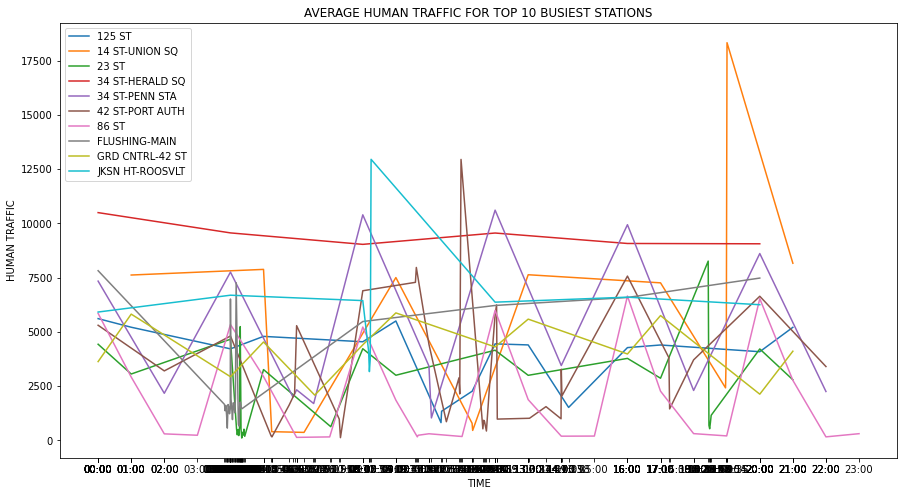

In [26]:
plt.figure(figsize=(20,8))
average_hourly_overday(mta2_1, n_stations = 10)
plt.show()

In [27]:
mta_test=mta2_1.drop('TIME',axis=1)
mta_test

,STATION,DATETIME,TRAFFIC
0,JOURNAL SQUARE,2020-08-14 16:00:00,75355.0
1,JOURNAL SQUARE,2020-08-14 16:00:00,75087.0
2,JOURNAL SQUARE,2020-08-14 12:00:00,74670.0
3,JOURNAL SQUARE,2020-08-14 08:00:00,74212.0
4,42 ST-PORT AUTH,2020-08-22 12:00:00,58766.0
...,...,...,...
93531,JAMAICA 179 ST,2020-07-25 20:00:00,2.0
93532,GROVE STREET,2020-08-14 00:00:00,2.0
93533,PATH NEW WTC,2020-07-27 00:00:00,2.0
93534,NEWARK C,2020-08-02 00:00:00,2.0


In [28]:
def average_hourly_overday_test(df, n_stations = 10):
    """ Return line chart that shows average daily TRAFFIC
        by TIME (i.e. 4-hour time intervals)
    """
    df['TIME'] = df['DATETIME'].apply(lambda x: x.time())
    # Take only relavent columns
#     print(df)
    df_pre = df[['STATION', 'DATETIME', 'TRAFFIC', 'TIME']] 
    #print(df_pre)
    # Group into dailies through sum and then find the average for stations per day
    df1 = df_pre.groupby(['STATION', pd.Grouper(key='DATETIME', freq='1D')])\
    .sum()\
    .reset_index()\
    .groupby(['STATION'])\
    .mean()\
    .TRAFFIC\
    .sort_values(ascending=False)[0:n_stations]
    
    # Collection station labels
    stations = df1.reset_index().STATION.unique()
    
     # Create new dataframe 
    df2 = df_pre[df.STATION.apply(lambda x: x in stations)].copy()
    
    # Create time columnn
    df3 = df2.groupby(['STATION', 'DATETIME', 'TIME'])\
    .sum()\
    .reset_index()\
    .groupby(['STATION', 'TIME'])\
    .mean()\
    .reset_index()
    #print(df3)
    # Plot
    fig, ax = plt.subplots(figsize=(15,8))
    labels = []
    for key, grp in df3.groupby('STATION'):
        labels.append(key)
        _ = grp.plot(ax=ax, x='TIME', y='TRAFFIC')

    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    ax.set_xticks(df3.TIME.tolist())
    ax.set_ylabel('HUMAN TRAFFIC')
    ax.set_xlabel('TIME')
    ax.set_title('AVERAGE HUMAN TRAFFIC FOR TOP 10 BUSIEST STATIONS')
    fig.show()

<ipython-input-28-e7ca55d64788>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


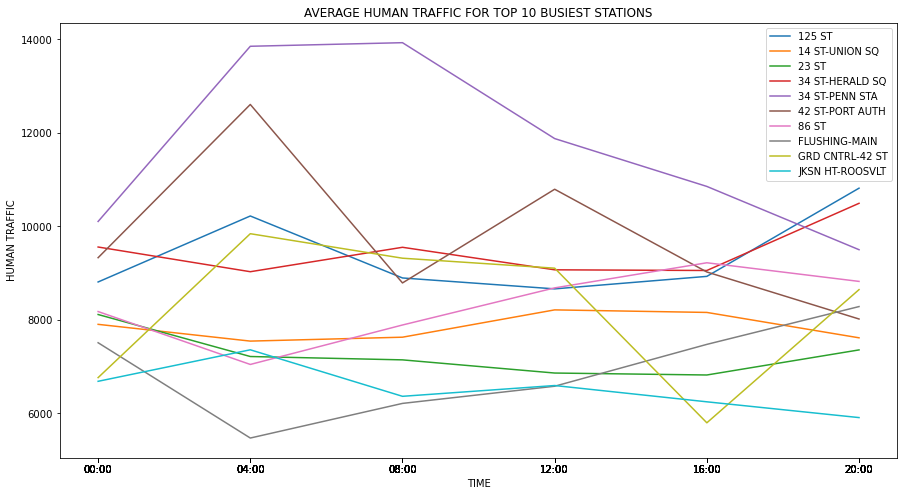

In [29]:
average_hourly_overday_test(mta_test, n_stations = 10)